<a href="https://colab.research.google.com/github/wafiesa/Codes/blob/master/Melaka_Terraced_Property_Sales_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Melaka Single and Double Storey Terraced Property Sale in 2022 with Map Analysis**

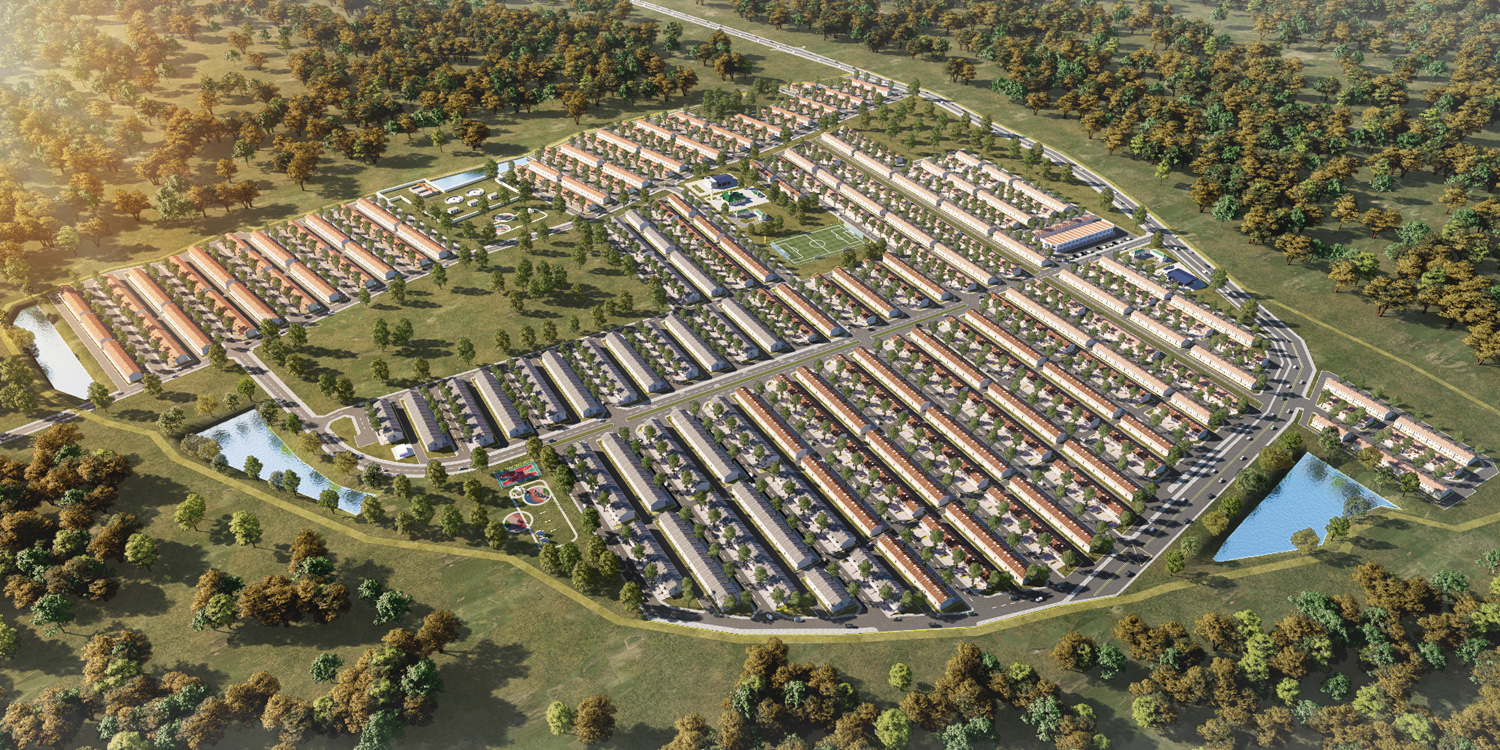

**1. Introduction**

Property sales for single and double storey terraced property market in Melaka recorded at RM869,477,476.00 with 2870 transactions in 2022. These transactions represent freehold and leasehold terraced houses covering 457 scheme name/areas located at 3 districts namely Melaka Tengah, Alor Gajah and Jasin.

The state’ property market is expected to continue its growth momentum with future developments projects are expected to create positive impact on the state’s property market such Melaka Waterfront Economic Zone (MWEZ) by 2035 and on-going contruction of Harbour City Melaka by Hatten Land Ltd.

These two mega projects surely strengthen the property outlook for Melaka in the future.


---

![MWEZ.png](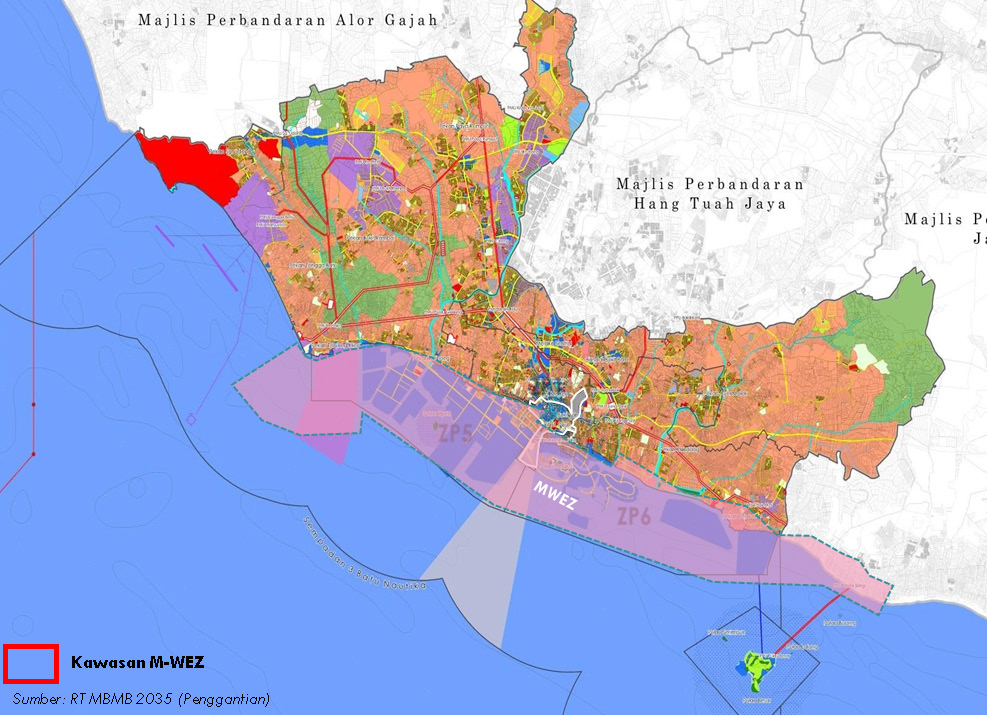HarbourCity.avif)



---



**2. The Terraced Property Outlook**

Single and double storey terraced residentials will be the property segments to watch as Scientex Berhad had launched new project, Scientex Durian Tunggal 2 on 202 acres land while Parkland Group had launched Bandar Botani Parkland in Jasin. These two major residentials will be new offerings for future home buyers looking for single and double storey terraced property.





In [83]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [84]:
import numpy as np
import pandas as pd
import os
import warnings
warnings.filterwarnings("ignore")

**1. Data Prepocessing**

In [106]:
sales=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/dataset_2022.csv")

In [107]:
sales.shape

(2870, 10)

In [108]:
sales.head()

,Property Type,District,Mukim,Scheme Name/Area,"Month, Year of Transaction Date",Tenure,Land Area,Unit,Main Floor Area,Transaction Price
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,October 2022,Leasehold,143.0,sq.m,85.84,200000
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,July 2022,Freehold,143.0,sq.m,76.64,173000
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,September 2022,Freehold,143.0,sq.m,77.01,210000
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,October 2022,Leasehold,232.0,sq.m,75.72,361111
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,January 2022,Freehold,128.0,sq.m,83.61,230000


In [109]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Property Type                    2870 non-null   object 
 1   District                         2870 non-null   object 
 2   Mukim                            2870 non-null   object 
 3   Scheme Name/Area                 2870 non-null   object 
 4   Month, Year of Transaction Date  2870 non-null   object 
 5   Tenure                           2870 non-null   object 
 6   Land Area                        2870 non-null   float64
 7   Unit                             2870 non-null   object 
 8   Main Floor Area                  2870 non-null   float64
 9   Transaction Price                2870 non-null   int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 224.3+ KB


**Check the columns type**

In [110]:
print('Column name')
for col in sales.columns:
    if sales[col].dtype=='object':
        print(col, sales[col].nunique())

Column name
Property Type 2
District 3
Mukim 70
Scheme Name/Area 457
Month, Year of Transaction Date 12
Tenure 2
Unit 1


In [111]:
numer = ['Land Area','Main Floor Area','Transaction Price']
for col in numer:
    sales[col] = pd.to_numeric(sales[col], errors='coerce')

categ = ['Property Type', 'District', 'Mukim', 'Scheme Name/Area', 'Tenure', 'Unit']
for col in categ:
    sales[col] = sales[col].astype('category')

sales['Month, Year of Transaction Date'] = pd.to_datetime(sales['Month, Year of Transaction Date'], errors='coerce')

In [112]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2870 entries, 0 to 2869
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Property Type                    2870 non-null   category      
 1   District                         2870 non-null   category      
 2   Mukim                            2870 non-null   category      
 3   Scheme Name/Area                 2870 non-null   category      
 4   Month, Year of Transaction Date  2870 non-null   datetime64[ns]
 5   Tenure                           2870 non-null   category      
 6   Land Area                        2870 non-null   float64       
 7   Unit                             2870 non-null   category      
 8   Main Floor Area                  2870 non-null   float64       
 9   Transaction Price                2870 non-null   int64         
dtypes: category(6), datetime64[ns](1), float64(2), int64(1)
memo

**Check missing values**

In [113]:
sales.isna().sum()

Property Type                      0
District                           0
Mukim                              0
Scheme Name/Area                   0
Month, Year of Transaction Date    0
Tenure                             0
Land Area                          0
Unit                               0
Main Floor Area                    0
Transaction Price                  0
dtype: int64

Based from the dataset, there is no missing values.

In [114]:
sales

,Property Type,District,Mukim,Scheme Name/Area,"Month, Year of Transaction Date",Tenure,Land Area,Unit,Main Floor Area,Transaction Price
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,2022-10-01,Leasehold,143.0,sq.m,85.84,200000
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-07-01,Freehold,143.0,sq.m,76.64,173000
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-09-01,Freehold,143.0,sq.m,77.01,210000
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,2022-10-01,Leasehold,232.0,sq.m,75.72,361111
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,2022-01-01,Freehold,128.0,sq.m,83.61,230000
...,...,...,...,...,...,...,...,...,...,...
2865,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-09-01,Freehold,205.0,sq.m,126.16,370000
2866,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-10-01,Freehold,111.0,sq.m,126.16,290000
2867,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN KASTURI FASA 1 & 2,2022-01-01,Freehold,143.0,sq.m,133.40,555000
2868,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN SINN,2022-09-01,Freehold,200.0,sq.m,90.20,390000


From the original dataset, we could see that the unit in used is square meter to represent the Land Area and Main Floor Area. Although this is sufficient to proceed with exploratory data analysis but the most common name used in the market to represent the built size is in square feet measurement.

Thus we can convert the Land Area and Main Floor Area to square feet (sq.ft). Also we can rename the Land Area to Land Size while the Main Floor Area to Build Size.

In [115]:
sales['Land Size'] = sales['Land Area'] * 10.7639
sales['Build Size'] = sales['Main Floor Area'] * 10.7639
sales.drop(['Land Area', 'Main Floor Area'], axis=1, inplace=True)
sales

,Property Type,District,Mukim,Scheme Name/Area,"Month, Year of Transaction Date",Tenure,Unit,Transaction Price,Land Size,Build Size
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,2022-10-01,Leasehold,sq.m,200000,1539.2377,923.973176
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-07-01,Freehold,sq.m,173000,1539.2377,824.945296
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-09-01,Freehold,sq.m,210000,1539.2377,828.927939
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,2022-10-01,Leasehold,sq.m,361111,2497.2248,815.042508
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,2022-01-01,Freehold,sq.m,230000,1377.7792,899.969679
...,...,...,...,...,...,...,...,...,...,...
2865,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-09-01,Freehold,sq.m,370000,2206.5995,1357.973624
2866,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-10-01,Freehold,sq.m,290000,1194.7929,1357.973624
2867,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN KASTURI FASA 1 & 2,2022-01-01,Freehold,sq.m,555000,1539.2377,1435.904260
2868,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN SINN,2022-09-01,Freehold,sq.m,390000,2152.7800,970.903780


In [116]:
sales=sales[['Property Type','District','Mukim','Scheme Name/Area','Month, Year of Transaction Date', 'Tenure', 'Land Size', 'Unit', 'Build Size', 'Transaction Price']]
sales

,Property Type,District,Mukim,Scheme Name/Area,"Month, Year of Transaction Date",Tenure,Land Size,Unit,Build Size,Transaction Price
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,2022-10-01,Leasehold,1539.2377,sq.m,923.973176,200000
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-07-01,Freehold,1539.2377,sq.m,824.945296,173000
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-09-01,Freehold,1539.2377,sq.m,828.927939,210000
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,2022-10-01,Leasehold,2497.2248,sq.m,815.042508,361111
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,2022-01-01,Freehold,1377.7792,sq.m,899.969679,230000
...,...,...,...,...,...,...,...,...,...,...
2865,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-09-01,Freehold,2206.5995,sq.m,1357.973624,370000
2866,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-10-01,Freehold,1194.7929,sq.m,1357.973624,290000
2867,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN KASTURI FASA 1 & 2,2022-01-01,Freehold,1539.2377,sq.m,1435.904260,555000
2868,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN SINN,2022-09-01,Freehold,2152.7800,sq.m,970.903780,390000


In [117]:
sales['Unit'].replace('sq.m', 'sq.ft', inplace=True)
sales

,Property Type,District,Mukim,Scheme Name/Area,"Month, Year of Transaction Date",Tenure,Land Size,Unit,Build Size,Transaction Price
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,2022-10-01,Leasehold,1539.2377,sq.ft,923.973176,200000
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-07-01,Freehold,1539.2377,sq.ft,824.945296,173000
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-09-01,Freehold,1539.2377,sq.ft,828.927939,210000
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,2022-10-01,Leasehold,2497.2248,sq.ft,815.042508,361111
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,2022-01-01,Freehold,1377.7792,sq.ft,899.969679,230000
...,...,...,...,...,...,...,...,...,...,...
2865,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-09-01,Freehold,2206.5995,sq.ft,1357.973624,370000
2866,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-10-01,Freehold,1194.7929,sq.ft,1357.973624,290000
2867,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN KASTURI FASA 1 & 2,2022-01-01,Freehold,1539.2377,sq.ft,1435.904260,555000
2868,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN SINN,2022-09-01,Freehold,2152.7800,sq.ft,970.903780,390000


**Latitude and Longitude Position**

The information for Latitude and Longitude were required from third party platform and it represents approximate positions for each scheme name/area.

This information will be used to plot the map using portly express.



In [152]:
latlong=pd.read_csv("/content/drive/MyDrive/Colab_Notebooks/latlong.csv")
latlong

,Scheme Name/Area,Lat,Long
0,TAMAN SERI BAYU,2.384740,102.212509
1,TAMAN BKT INDAH,2.350550,102.103860
2,TAMAN BKT INDAH,2.350550,102.103860
3,TAMAN BELIMBING HARMONI,2.335506,102.266894
4,TAMAN VISTA BELIMBING,2.328142,102.266958
...,...,...,...
2865,TAMAN TG MINYAK UTAMA,2.268306,102.194419
2866,TAMAN TG MINYAK UTAMA,2.268306,102.194419
2867,TAMAN KASTURI FASA 1 & 2,2.192962,102.272744
2868,TAMAN SINN,2.194609,102.270545


In [153]:
latlong.drop(['Scheme Name/Area'], axis=1, inplace=True)
latlong

,Lat,Long
0,2.384740,102.212509
1,2.350550,102.103860
2,2.350550,102.103860
3,2.335506,102.266894
4,2.328142,102.266958
...,...,...
2865,2.268306,102.194419
2866,2.268306,102.194419
2867,2.192962,102.272744
2868,2.194609,102.270545


In [154]:
new_sales = sales.merge(latlong, left_index=True, right_index=True)
new_sales

,Property Type,District,Mukim,Scheme Name/Area,"Month, Year of Transaction Date",Tenure,Land Size,Unit,Build Size,Transaction Price,Lat,Long
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,2022-10-01,Leasehold,1539.2377,sq.ft,923.973176,200000,2.384740,102.212509
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-07-01,Freehold,1539.2377,sq.ft,824.945296,173000,2.350550,102.103860
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2022-09-01,Freehold,1539.2377,sq.ft,828.927939,210000,2.350550,102.103860
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,2022-10-01,Leasehold,2497.2248,sq.ft,815.042508,361111,2.335506,102.266894
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,2022-01-01,Freehold,1377.7792,sq.ft,899.969679,230000,2.328142,102.266958
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-09-01,Freehold,2206.5995,sq.ft,1357.973624,370000,2.268306,102.194419
2866,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2022-10-01,Freehold,1194.7929,sq.ft,1357.973624,290000,2.268306,102.194419
2867,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN KASTURI FASA 1 & 2,2022-01-01,Freehold,1539.2377,sq.ft,1435.904260,555000,2.192962,102.272744
2868,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN SINN,2022-09-01,Freehold,2152.7800,sq.ft,970.903780,390000,2.194609,102.270545


In [155]:
new_sales=new_sales[['Property Type','District','Mukim','Scheme Name/Area', 'Lat', 'Long', 'Month, Year of Transaction Date', 'Tenure', 'Land Size', 'Unit', 'Build Size', 'Transaction Price']]
new_sales

,Property Type,District,Mukim,Scheme Name/Area,Lat,Long,"Month, Year of Transaction Date",Tenure,Land Size,Unit,Build Size,Transaction Price
0,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Alor Gajah,TAMAN SERI BAYU,2.384740,102.212509,2022-10-01,Leasehold,1539.2377,sq.ft,923.973176,200000
1,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2.350550,102.103860,2022-07-01,Freehold,1539.2377,sq.ft,824.945296,173000
2,1 - 1 1/2 Storey Terraced,Alor Gajah,Bdr Masjid Tanah,TAMAN BKT INDAH,2.350550,102.103860,2022-09-01,Freehold,1539.2377,sq.ft,828.927939,210000
3,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN BELIMBING HARMONI,2.335506,102.266894,2022-10-01,Leasehold,2497.2248,sq.ft,815.042508,361111
4,1 - 1 1/2 Storey Terraced,Alor Gajah,Belimbing,TAMAN VISTA BELIMBING,2.328142,102.266958,2022-01-01,Freehold,1377.7792,sq.ft,899.969679,230000
...,...,...,...,...,...,...,...,...,...,...,...,...
2865,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2.268306,102.194419,2022-09-01,Freehold,2206.5995,sq.ft,1357.973624,370000
2866,2 - 2 1/2 Storey Terraced,Melaka Tengah,Tg Minyak,TAMAN TG MINYAK UTAMA,2.268306,102.194419,2022-10-01,Freehold,1194.7929,sq.ft,1357.973624,290000
2867,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN KASTURI FASA 1 & 2,2.192962,102.272744,2022-01-01,Freehold,1539.2377,sq.ft,1435.904260,555000
2868,2 - 2 1/2 Storey Terraced,Melaka Tengah,Ujong Pasir,TAMAN SINN,2.194609,102.270545,2022-09-01,Freehold,2152.7800,sq.ft,970.903780,390000


In [122]:
new_sales.to_csv('melaka_terraced_property_sales_2022.csv', index=False)
new_sales.to_csv('/content/drive/MyDrive/Colab_Notebooks/melaka_terraced_property_sales_2022.csv')

In [123]:
numerical_variables =  new_sales.select_dtypes(include=['number']).columns
columns_to_exclude = ['Property Type','District','Mukim','Scheme Name/Area','Lat','Long','Month, Year of Transaction Date','Unit']
statistics = new_sales.drop(columns=columns_to_exclude).describe().round(2)

column_sums = new_sales[numerical_variables].sum()
statistics.loc['sum'] = column_sums

def format_accounting(value):
    return "RM{:,.2f}".format(value)

formatted_statistics = statistics.style.format({
    'Transaction Price': format_accounting
})

formatted_statistics

,Land Size,Build Size,Transaction Price
count,2870.000000,2870.000000,"RM2,870.00"
mean,1643.010000,1149.640000,"RM302,953.82"
std,633.460000,447.150000,"RM121,401.47"
min,143.000000,520.000000,"RM90,000.00"
25%,1302.430000,819.990000,"RM225,000.00"
50%,1528.470000,989.960000,"RM270,000.00"
75%,1679.170000,1369.110000,"RM363,675.00"
max,8438.900000,4260.030000,"RM1,200,000.00"
sum,4715451.098807,3299474.606600,"RM869,477,476.00"


In [ ]:
formatted_statistics

Now that the dataset has been processed to a desire format, let us explore the Melaka Property Sales Year 2022 by looking at the usefull statistics below.

**2. Data Visualization**

From the statistics summary above, we can observe that there were 2870 transactions made in the year 2022.

The maximum transaction price was recorded at RM1.2 million while the minimum transaction price was clocked at RM90,000.00. The mean transaction price is RM302,953.82.

Since the dataset represents landed single storey to double storey houses, exploratory data analysis (EDA) can be used to understand the said property market.  

**2.1 Boxplot of Transaction Price by District, Tenure and Property Type**

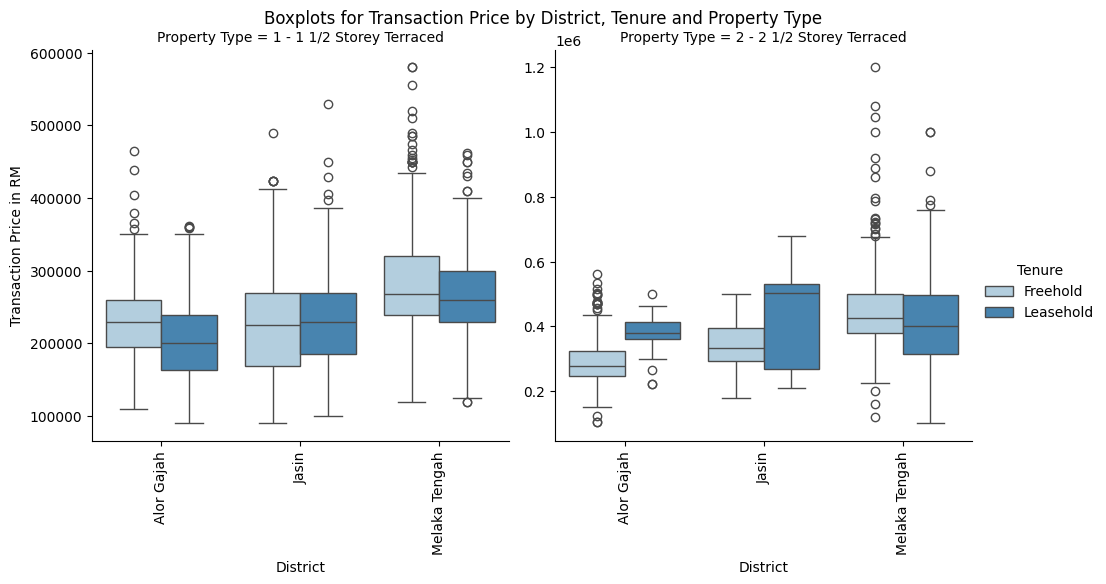

In [124]:
from matplotlib import pyplot as plt
import seaborn as sns
g = sns.FacetGrid(new_sales, col="Property Type", col_wrap=2, height=5, sharex=False, sharey=False)
g.map_dataframe(sns.boxplot, x='District', y='Transaction Price', hue='Tenure', palette='Blues')
g.add_legend(title='Tenure')
g.set_xticklabels(rotation=90)
g.set_axis_labels('District', 'Transaction Price in RM')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Boxplots for Transaction Price by District, Tenure and Property Type')
plt.show()

The boxplots above illustrate the property types according to the districts. Furthermore, the boxplots also indicate the single storey terraced and double storey terraced houses by land status (tenure) of Freehold and Leasehold.

The freehold land are usually more sort after since it allows the owner to keep the land forever meanwhile leaseholds are restricted for stipulated number of years for example 99 years.

However, this could not be the entire reason for landowner to decide their purchase since there were significant transactions recorded for leasehold units among the districts.

**2.2 Heatmap of District vs Tenure**

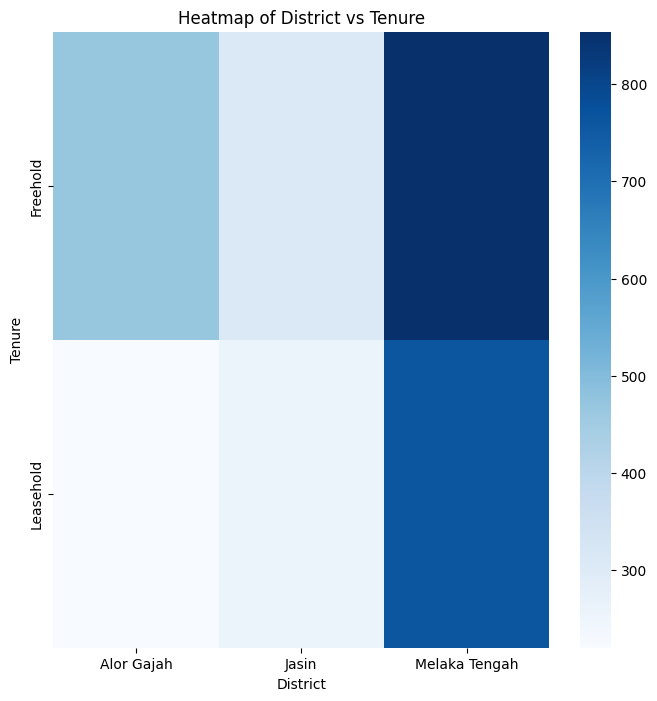

In [125]:
from matplotlib import pyplot as plt
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['Tenure'].value_counts()
    for x_label, grp in new_sales.groupby('District')
})
sns.heatmap(df_2dhist, cmap='Blues')
plt.xlabel('District')
plt.ylabel('Tenure')
plt.title('Heatmap of District vs Tenure')
plt.show()

In [183]:
tenure_to_filter = ['Freehold', 'Leasehold']
district_counts_combined = new_sales[new_sales['Tenure'].isin(tenure_to_filter)] \
    .groupby(['District', 'Tenure']) \
    .size() \
    .unstack(fill_value=0)
district_counts_combined['Total'] = district_counts_combined.sum(axis=1)
district_counts_combined.loc['Overall'] = district_counts_combined.sum(axis=0)
print(district_counts_combined)


Tenure         Freehold  Leasehold  Total
District                                 
Alor Gajah          468        220    688
Jasin               311        256    567
Melaka Tengah       854        761   1615
Overall            1633       1237   2870


From the heatmap of district versus tenure above we can observe that majority transactions were concenrated in Melaka Tengah district with 1615 units sold followed by Alor Gajah at 688 units and Jasin at 567 units.

At this point, we can see that landed residentials in Melaka Tengah is the most sort after.

In the aspect of tenure, freehold residentials were preferred higher at 1633 transactions representing the highest in Melaka Tengah at 854 units followed by Alor Gajah at 468 units while 311 units were recorded in Jasin.

Meanwhile leasehold residentials were recorded at 1237 transactions representing 761 units in Melaka Tengah, 256 units in Jasin and 220 units in Alor Gajah.

**2.3 Heatmap of Property Type vs District**

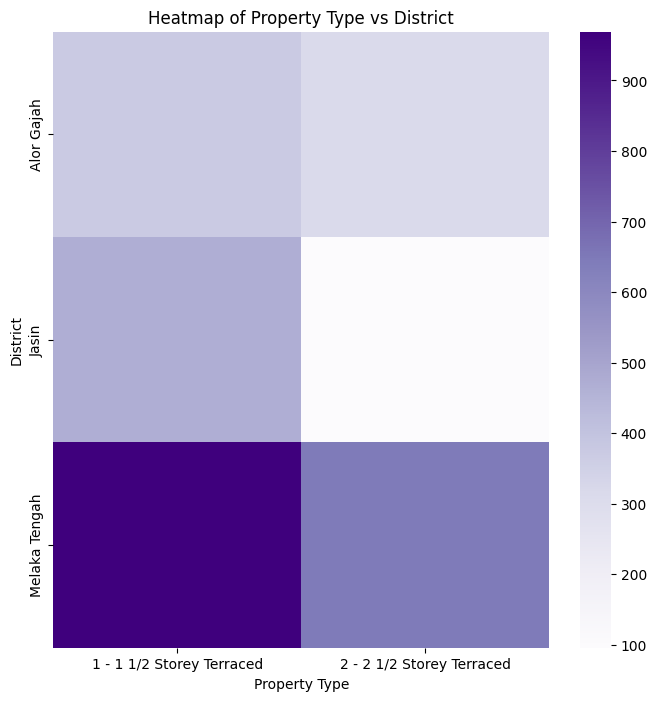

In [127]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['District'].value_counts()
    for x_label, grp in new_sales.groupby('Property Type')
})
sns.heatmap(df_2dhist, cmap='Purples')
plt.xlabel('Property Type')
plt.ylabel('District')
plt.title('Heatmap of Property Type vs District')
plt.show()

In [128]:
property_types_to_filter = ['1 - 1 1/2 Storey Terraced', '2 - 2 1/2 Storey Terraced']
new_district_counts_combined = new_sales[new_sales['Property Type'].isin(property_types_to_filter)] \
    .groupby(['Property Type', 'District']) \
    .size() \
    .unstack(fill_value=0)
new_district_counts_combined['Total'] = new_district_counts_combined.sum(axis=1)
new_district_counts_combined.loc['Overall'] = new_district_counts_combined.sum(axis=0)

print(new_district_counts_combined)

District                   Alor Gajah  Jasin  Melaka Tengah  Total
Property Type                                                     
1 - 1 1/2 Storey Terraced         375    471            969   1815
2 - 2 1/2 Storey Terraced         313     96            646   1055
Overall                           688    567           1615   2870


The heatmap above shows the comparisson between property types and the districts. Melaka Tengah sees more single storey terraced sold in 2022 at 969 units comparing to Jasin of 471 units while Alor Gajah of 375 units.

While sale transactions of double storey terraced sold in Melaka is recorded highest in Melaka Tengah at 646 units followed by Alor Gajah of 313 and Jasin of 96 units.

Overall, single storey terraced houses were sold a total of 1815 units compared to 1055 units of double storey terraced houses.

In [156]:
import plotly.express as px

fig = px.scatter_mapbox(new_sales, lat='Lat', lon='Long', color='Transaction Price', size='Transaction Price',  hover_data= {'Scheme Name/Area': True, 'District': True, 'Build Size': True},
                        color_continuous_scale=px.colors.sequential.Viridis, mapbox_style='carto-positron', size_max=15, zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [157]:
single_storey_filtered = new_sales[new_sales['Property Type'] == '1 - 1 1/2 Storey Terraced'][new_sales['Tenure'] == 'Freehold']
fig = px.scatter_mapbox(single_storey_filtered, lat='Lat', lon='Long', color='Transaction Price', size='Transaction Price', hover_data= {'Scheme Name/Area': True, 'District': True, 'Build Size': True},
                        color_continuous_scale=px.colors.sequential.Viridis, mapbox_style='carto-positron', size_max=15, zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [158]:
single_storey_filtered = new_sales[new_sales['Property Type'] == '1 - 1 1/2 Storey Terraced'][new_sales['Tenure'] == 'Leasehold']
fig = px.scatter_mapbox(single_storey_filtered, lat='Lat', lon='Long', color='Transaction Price', size='Transaction Price', hover_data= {'Scheme Name/Area': True, 'District': True, 'Build Size': True},
                        color_continuous_scale=px.colors.sequential.Viridis, mapbox_style='carto-positron', size_max=15, zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [159]:
double_storey_filtered = new_sales[new_sales['Property Type'] == '2 - 2 1/2 Storey Terraced'][new_sales['Tenure'] == 'Freehold']
fig = px.scatter_mapbox(single_storey_filtered, lat='Lat', lon='Long', color='Transaction Price', size='Transaction Price', hover_data= {'Scheme Name/Area': True, 'District': True, 'Build Size': True},
                        color_continuous_scale=px.colors.sequential.Viridis, mapbox_style='carto-positron', size_max=15, zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [160]:
double_storey_filtered = new_sales[new_sales['Property Type'] == '2 - 2 1/2 Storey Terraced'][new_sales['Tenure'] == 'Leasehold']
fig = px.scatter_mapbox(single_storey_filtered, lat='Lat', lon='Long', color='Transaction Price', size='Transaction Price', hover_data= {'Scheme Name/Area': True, 'District': True, 'Build Size': True},
                        color_continuous_scale=px.colors.sequential.Viridis, mapbox_style='carto-positron', size_max=15, zoom=10)

fig.update_layout(mapbox_style='open-street-map')
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [139]:
categorical_columns = new_sales.select_dtypes(include=['category']).columns
categorical_descriptions = new_sales[categorical_columns].describe()

print(categorical_descriptions)

                    Property Type       District           Mukim  \
count                        2870           2870            2870   
unique                          2              3              70   
top     1 - 1 1/2 Storey Terraced  Melaka Tengah  Durian Tunggal   
freq                         1815           1615             293   

                             Scheme Name/Area    Tenure   Unit  
count                                    2870      2870   2870  
unique                                    457         2      1  
top     TAMAN SCIENTEX (BUKIT TAMBUN PERDANA)  Freehold  sq.ft  
freq                                      154      1633   2870  


In [ ]:
categorical_columns = new_sales.select_dtypes(include=['category']).columns
categorical_descriptions = new_sales[categorical_columns].describe()

print(categorical_descriptions)